In [849]:
%load_ext autoreload
%autoreload 2

# standard python imports
import numpy as np
import matplotlib.pyplot as plt

# tidy3d imports
import tidy3d as td
import tidy3d.web as web

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [850]:
# for easy conversion of units
unit = 1

wavelength = 1 * unit
f0 = td.C_0 / wavelength
print(wavelength, f0)

# length and location of the dipole
dipole_length = 0 # Hertzian dipole
dipole_size = [0, 0, 0]

# buffer between the dipole and the near field monitor
buffer_mon = 2 * wavelength

# Set the domain size in x, y, and z
domain_size = 8 * wavelength

# Define material properties
air = td.Medium(permittivity=1)

# resolution control
#grids_per_wavelength = 25
grids_per_wavelength = 30

# create the geometry
geometry = []

# grid size (um)
dl = wavelength / grids_per_wavelength

# Define PML layers
pml_layers = 3*[td.PML()]

# construct simulation size array
sim_size = (domain_size, domain_size, domain_size)

1 299792458580946.8


## Create the dipole source

In [851]:
# Bandwidth in Hz
fwidth = f0 / 10.0

# Gaussian source offset; the source peak is at time t = offset/fwidth
offset = 4.

# time dependence of source
gaussian = td.GaussianPulse(freq0=f0, fwidth=fwidth, offset=offset)

source = td.VolumeSource(
    center=dipole_center,
    size=dipole_size,
    source_time=gaussian,
    polarization='Ez')

# Simulation run time past the source decay (around t=2*offset/fwidth)
run_time = 40 / fwidth


In [852]:
# create a volume monitor around the sphere
mon_size = [x + buffer_mon for x in dipole_size]

monitor = td.FieldMonitor(
    center=dipole_center,
    size=mon_size,
    freqs=[f0],
    name='near_field')

# get the surface monitors associated with the volume monitor
monitors = monitor.surfaces()


## Create Simulation

Now we can put everything together and define a simulation class to be run



In [853]:
sim = td.Simulation(
    size=sim_size,
    grid_size=[dl, dl, dl],
    structures=geometry,
    sources=[source],
    monitors=monitors,
    run_time=run_time,
    pml_layers=pml_layers
)


## Visualize Geometry

Lets take a look and make sure everything is defined properly


/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Figure size 1440x576 with 6 Axes>

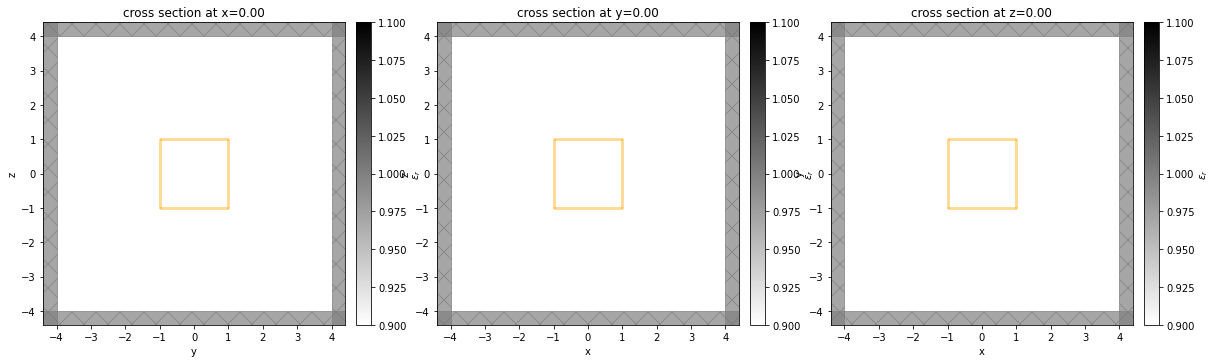

In [854]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
sim.plot_eps(x=0, ax=ax1);
sim.plot_eps(y=0, ax=ax2);
sim.plot_eps(z=0, ax=ax3);


## Run Simulation

Now we can run the simulation over time and measure the results to plot


In [855]:
# Run simulation
import tidy3d.web as web
sim_data = web.run(sim, task_name='dipole', path='data/simulation.hdf5')
# sim_data = web.load('3e650fd4-548e-4556-b38a-e473c3c53eb7', sim, path='data/sphereRCS.hdf5')


Using Tidy3D credentials from stored file


[19:42:12] INFO     Uploaded task 'dipole' with task_id                         ]8;id=825517;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=254352;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    'd9efe6f6-9a54-4558-9353-77ef8e08090f'.                                  

Output()

[19:42:13] status = queued                                                      ]8;id=66711;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=123548;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[19:42:29] status = preprocess                                                  ]8;id=30646;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=653860;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[19:42:58] status = running                                                     ]8;id=495494;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=447029;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[19:43:29] status = postprocess                                                 ]8;id=318640;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=682693;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[19:43:36] status = success                                                     ]8;id=711642;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=629248;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[19:43:37] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=572089;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=424241;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#483\483]8;;\
                    "data/simulation.hdf5"                                                   

Output()

[19:43:39] INFO     loading SimulationData from data/simulation.hdf5            ]8;id=337405;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=760830;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d/tidy3d/web/webapi.py#302\302]8;;\

We now can inspect the field patterns on the area monitors using the Tidy3D built in field visualization methods.

<Figure size 1080x252 with 6 Axes>

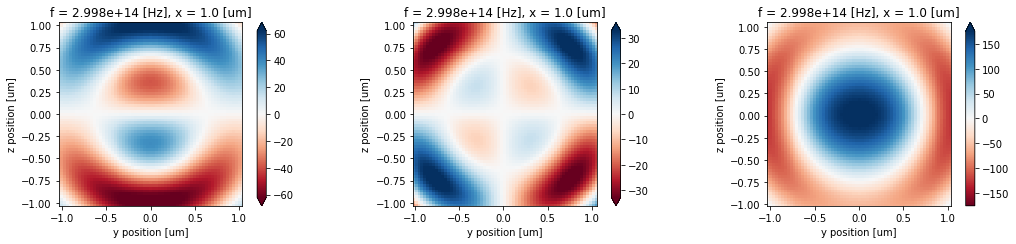

<Figure size 1080x252 with 6 Axes>

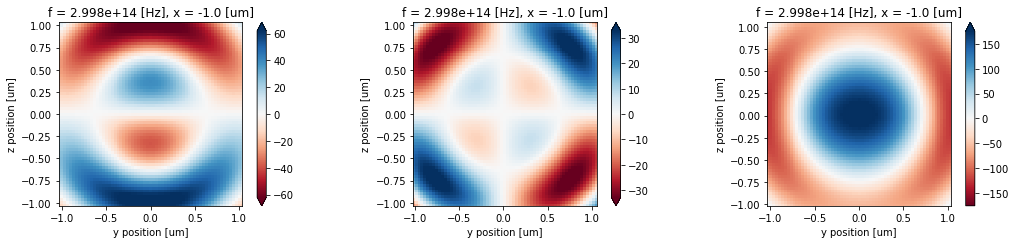

<Figure size 1080x252 with 6 Axes>

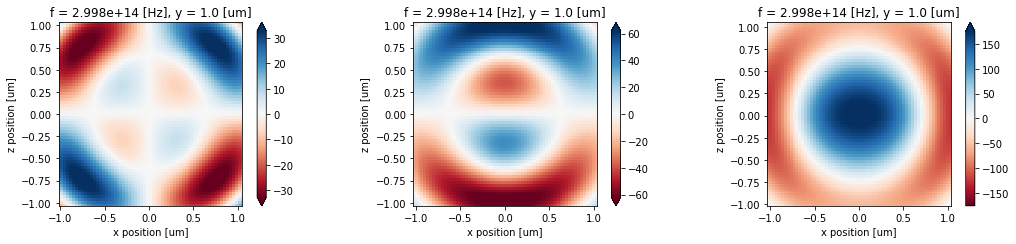

<Figure size 1080x252 with 6 Axes>

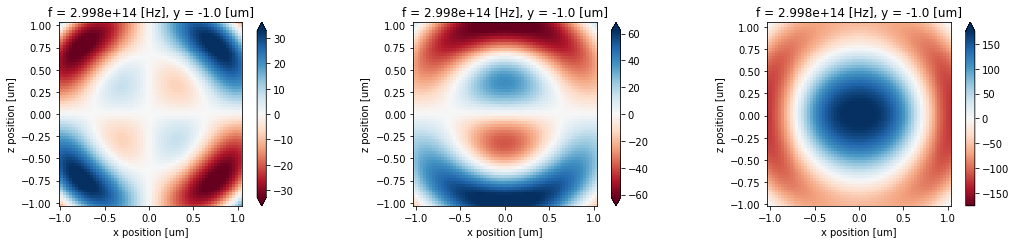

<Figure size 1080x252 with 6 Axes>

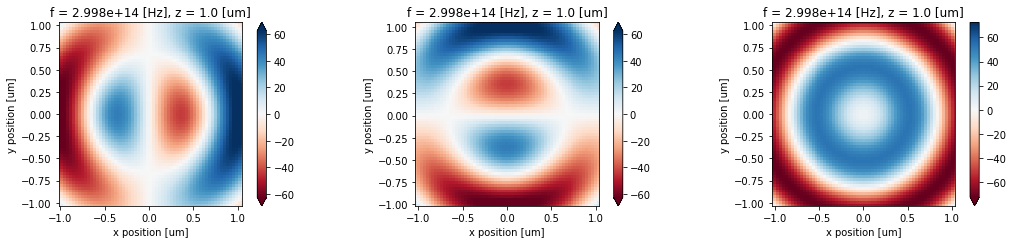

<Figure size 1080x252 with 6 Axes>

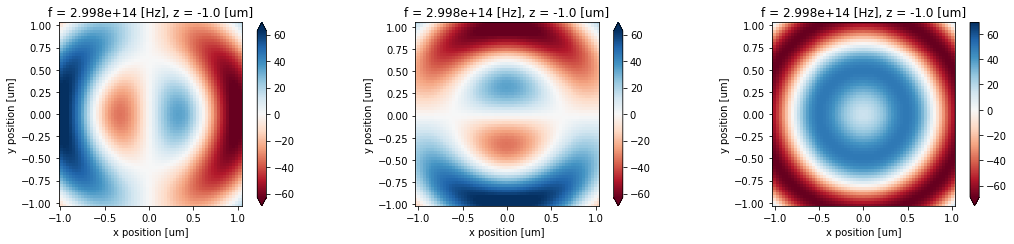

In [892]:
val = 'real'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ex', x=mon_size[0]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ey', x=mon_size[0]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ez', x=mon_size[0]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ex', x=-mon_size[0]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ey', x=-mon_size[0]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ez', x=-mon_size[0]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ex', y=mon_size[1]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ey', y=mon_size[1]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ez', y=mon_size[1]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ex', y=-mon_size[1]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ey', y=-mon_size[1]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ez', y=-mon_size[1]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ex', z=mon_size[2]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ey', z=mon_size[2]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ez', z=mon_size[2]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ex', z=-mon_size[2]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ey', z=-mon_size[2]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ez', z=-mon_size[2]/2, val=val, freq=f0, ax=ax3)

plt.show()


In [857]:

import copy

from tidy3d.plugins import Near2Far

n2fmons = copy.deepcopy(monitors)
#del n2fmons[0:3]
n2f = Near2Far(sim_data, mons=n2fmons, frequency=f0)


In [858]:
import tidy3d.constants as tdc

my_j = 1j

# reference: https://www.waves.utoronto.ca/prof/svhum/ece422/notes/05-dipole.pdf
def dipole_far_field(r, theta, phi, f):
    
    omega = 2 * np.pi * f
    k = omega * np.sqrt(tdc.EPSILON_0 * tdc.MU_0)
    
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    
    sin_phi = np.sin(phi)
    cos_phi = np.cos(phi)
    
    G = np.exp(my_j * k * r) / (4.0 * np.pi * r)
    prefactor = (-1 / (my_j * omega * tdc.EPSILON_0))

    # compute in spherical coordinates
    E_theta = -prefactor * sin_theta * G * (k**2)
    H_phi = -sin_theta * my_j * k * G
    
    # convert to cartesian coordinates
    # reference: https://en.wikipedia.org/wiki/Unit_vector#Spherical_coordinates
    Ex = cos_theta * cos_phi * E_theta
    Ey = cos_theta * sin_phi * E_theta
    Ez = -sin_theta * E_theta

    Hx = -sin_phi * H_phi
    Hy = cos_phi * H_phi
    Hz = 0

    return [0, E_theta, 0], [0, 0, H_phi], [Ex, Ey, Ez], [Hz, Hy, Hz]


In [859]:
# projection distance
far_distance = 100 * wavelength

num_theta = 50
num_phi = 2
thetas = np.linspace(0, np.pi, num_theta)
phis = np.linspace(0, np.pi/2, num_phi)

# initialize the far field values
RCS = np.zeros((num_theta, num_phi))
E = np.zeros((num_theta, num_phi))
Ec = np.zeros((3, num_theta, num_phi), dtype=complex)

# also compute and store the analytical far field
Ea = np.zeros((3, num_theta, num_phi), dtype=complex)

from rich.progress import track

# loop through points in the output plane
for i in track(np.arange(len(thetas)), description='Performing far-field transformation...'):

    theta = thetas[i]
    for j in np.arange(len(phis)):
        phi = phis[j]

        # compute and store the outputs from projection function at the focal plane
        _RCS = n2f.radar_cross_section(theta, phi)
        RCS[i, j] = np.squeeze(_RCS)

        _E, _H = n2f.fields_spherical(far_distance, theta, phi)
        Ec[:, i, j] = np.squeeze(_E)
        _E = np.linalg.norm(_E, 2)
        E[i, j] = np.squeeze(_E)
        
        Ea[:, i, j], temp1, temp2, temp3 = dipole_far_field(far_distance, theta, phi, f0)
        
        #print(RCS[i, j], E[i, j])


Output()

<Figure size 540x360 with 1 Axes>

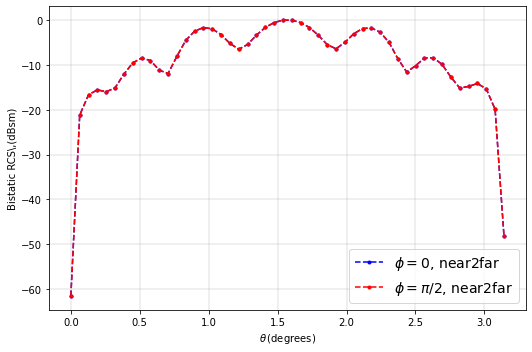

<Figure size 720x360 with 2 Axes>

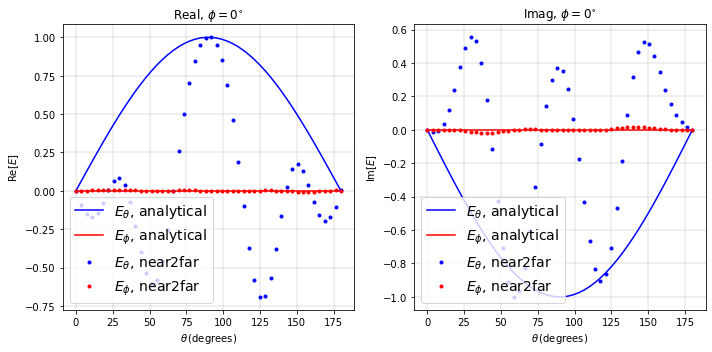

<Figure size 720x360 with 2 Axes>

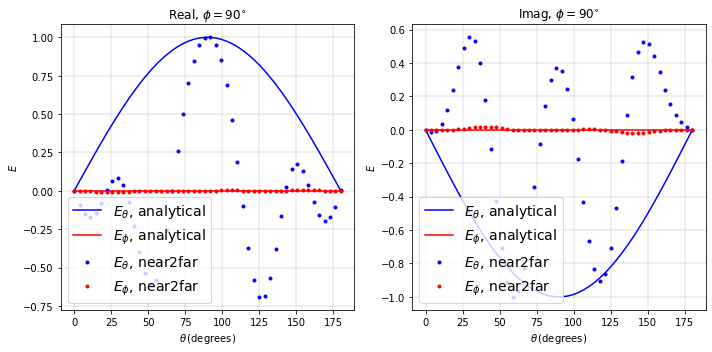

In [860]:
def scale_fn(val):
    val = val / np.max(np.abs(val))
    return 10.0*np.log10(val)

def plot_fn(val):
    return np.abs(val)

def realnorm_fn(val, norm_val):
    return np.real(val)/np.max(np.abs(np.real(norm_val)))

def imagnorm_fn(val, norm_val):
    return np.imag(val)/np.max(np.abs(np.imag(norm_val)))

RCS_phi0 = scale_fn(np.squeeze(RCS[:,0]))
RCS_phi90 = scale_fn(np.squeeze(RCS[:,1]))

E_phi0 = scale_fn(plot_fn(np.squeeze(E[:,0])))
E_phi90 = scale_fn(plot_fn(np.squeeze(E[:,1])))

fig, ax = plt.subplots(figsize=(7.5, 5))

#ax.plot(mie_theta_phi0, mie_phi0, '-b', label="$\\phi = 0$, Mie")
#ax.plot(mie_theta_phi90, mie_phi90, '-r', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, RCS_phi0, '.--b', label="$\\phi = 0$, near2far")
ax.plot(thetas, RCS_phi90, '.--r', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Bistatic RCS\\,(dBsm)",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax.legend(loc='best', prop={'size': 14})
plt.tight_layout()

#for i in np.arange(3):
#    Ea[i,:,:] /= np.max([np.abs(Ea[i,:,:]), np.abs(Ec[i,:,:])])
#    Ec[i,:,:] /= np.max([np.abs(Ea[i,:,:]), np.abs(Ec[i,:,:])])

#Ea /= np.max(np.abs(Ea))
#Ec /= np.max(np.abs(Ec))

fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[1,:,0], Ea), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[2,:,0], Ea), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[1,:,0], Ec), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[2,:,0], Ec), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Re[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 0^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[1,:,0], Ea), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[2,:,0], Ea), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[1,:,0], Ec), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[2,:,0], Ec), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Im[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 0^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()


fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[1,:,1], Ea), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[2,:,1], Ea), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[1,:,1], Ec), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[2,:,1], Ec), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 90^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[1,:,1], Ea), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[2,:,1], Ea), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[1,:,1], Ec), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[2,:,1], Ec), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 90^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()

plt.show()

In [944]:
import tidy3d.constants as tdc

spacetime_sign = 1 # 1 => exp(jkr), -1 => exp(-jkr)
my_j = 1j

# reference: https://www.waves.utoronto.ca/prof/svhum/ece422/notes/05-dipole.pdf
def dipole_near_field(r, theta, phi, f):
    
    omega = 2 * np.pi * f
    k = omega * np.sqrt(tdc.EPSILON_0 * tdc.MU_0)
    
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    
    sin_phi = np.sin(phi)
    cos_phi = np.cos(phi)
    
    G = np.exp(my_j * k * r) / (4.0 * np.pi * r)
    prefactor = spacetime_sign * (-1 / (my_j * omega * tdc.EPSILON_0))
    
    # compute in spherical coordinates
    E_r = prefactor * 2 * cos_theta * G * (-spacetime_sign * my_j * k / r + 1 / (r**2))
    E_theta = -prefactor * sin_theta * G * (k**2 + spacetime_sign * my_j * k / r - 1 / (r**2))
    H_phi = (sin_theta * G) * (-spacetime_sign * my_j * k + 1 / r)
    
    # convert to cartesian coordinates
    # reference: https://en.wikipedia.org/wiki/Unit_vector#Spherical_coordinates
    Ex = sin_theta * cos_phi * E_r + cos_theta * cos_phi * E_theta
    Ey = sin_theta * sin_phi * E_r + cos_theta * sin_phi * E_theta
    Ez = cos_theta * E_r - sin_theta * E_theta

    Hx = -sin_phi * H_phi
    Hy = cos_phi * H_phi
    Hz = np.zeros_like(Hx)
    
    E = np.stack((Ex, Ey, Ez))*np.exp(-my_j * np.pi/2)
    H = np.stack((Hx, Hy, Hz))*np.exp(-my_j * np.pi/2)

    return E, H


In [945]:
def pmesh(xs, ys, array, ax, cmap):
    im = ax.pcolormesh(xs, ys, array.T, cmap=cmap, shading='auto')
    return im

func = 'real'
def plotfunc(val):
    return np.real(val)

def plot_E_components(plot_x, plot_y, E_near):
    
    fig, (axes) =  plt.subplots(1, 3)
    fig.set_size_inches(10, 3)
    fig.tight_layout()

    for ax, direction, E in zip(axes, 'xyz', E_near):
        im = pmesh(plot_x, plot_y, plotfunc(E), ax=ax, cmap='RdBu')
        ax.set_title(f'analytical near field E{direction}')
        ax.set_aspect(1)
        ax.set_xlabel('x position [um]')
        ax.set_ylabel('y position [um]')
        plt.colorbar(im, ax=ax)


<Figure size 720x216 with 6 Axes>

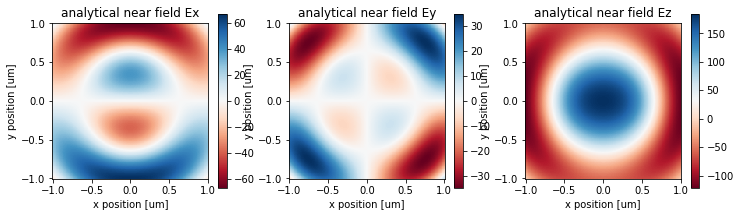

<Figure size 720x216 with 6 Axes>

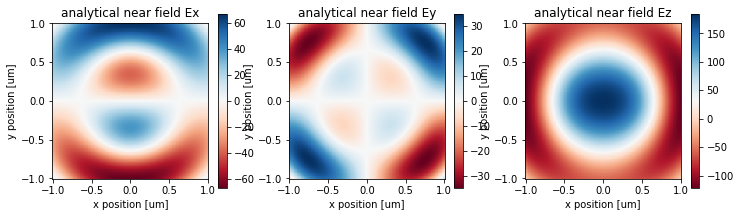

<Figure size 720x216 with 6 Axes>

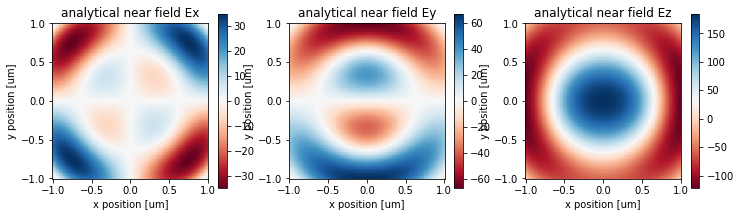

<Figure size 720x216 with 6 Axes>

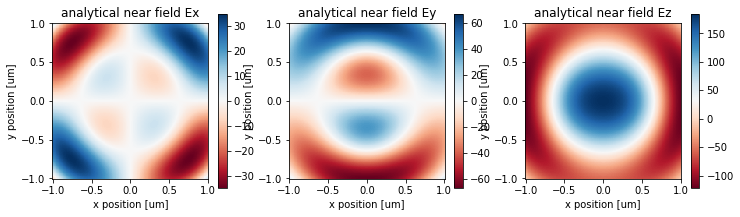

<Figure size 720x216 with 6 Axes>

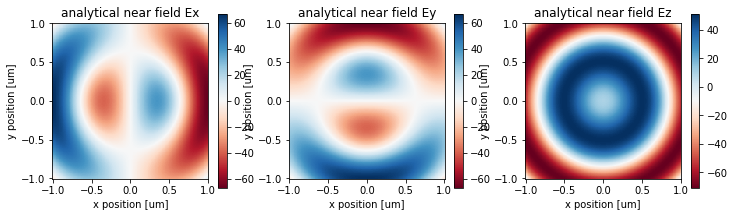

<Figure size 720x216 with 6 Axes>

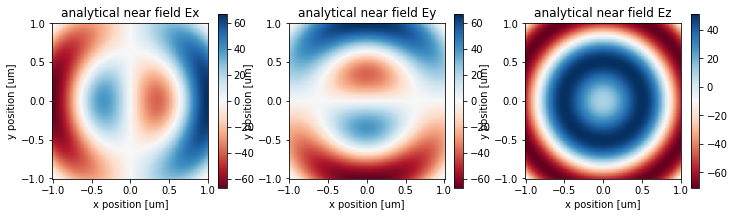

In [947]:
n2fa = Near2Far(sim_data, mons=n2fmons, frequency=f0)
n2fa.origin = [0, 0, 0]

# Compute analytical near fields on the surface monitors
num_samples = 200

for data, mon in zip(n2fa.data, monitors):
    
    mon_center = mon.center
    
    if data.mon_axis == 0:
        
        xp = mon_center[0]
        yp = np.linspace(mon.center[1]-mon.size[1]/2, mon.center[1]+mon.size[1]/2, num_samples)
        zp = np.linspace(mon.center[2]-mon.size[2]/2, mon.center[2]+mon.size[2]/2, num_samples)
                
        dy = mon.size[1] / num_samples
        dz = mon.size[2] / num_samples
        
        data.grid_sizes = (dy, dz)
        data.grid_points = np.meshgrid(yp, zp, indexing="ij")
        
        r, theta, phi = n2f._car_2_sph(xp, data.grid_points[0], data.grid_points[1])        
        E_near_an, H_near_an = dipole_near_field(r, theta, phi, f0)
        
        plot_E_components(yp, zp, E_near_an)
        
        signs = [-1.0, 1.0]
        if "-" in mon.name:
            signs = [-1.0 * i for i in signs]

        data.J = (signs[0] * H_near_an[2], signs[1] * H_near_an[1])
        data.M = (signs[1] * E_near_an[2], signs[0] * E_near_an[1])

    elif data.mon_axis == 1:
        
        xp = np.linspace(mon.center[0]-mon.size[0]/2, mon.center[0]+mon.size[0]/2, num_samples)
        yp = mon.center[1]
        zp = np.linspace(mon.center[2]-mon.size[2]/2, mon.center[2]+mon.size[2]/2, num_samples)
        
        dx = mon.size[0] / num_samples
        dz = mon.size[2] / num_samples
        
        data.grid_sizes = (dx, dz)
        data.grid_points = np.meshgrid(xp, zp, indexing="ij")

        r, theta, phi = n2f._car_2_sph(data.grid_points[0], yp, data.grid_points[1])        
        E_near_an, H_near_an = dipole_near_field(r, theta, phi, f0)

        plot_E_components(xp, zp, E_near_an)

        signs = [1.0, -1.0]
        if "-" in mon.name:
            signs = [-1.0 * i for i in signs]

        data.J = (signs[0] * H_near_an[2], signs[1] * H_near_an[0])
        data.M = (signs[1] * E_near_an[2], signs[0] * E_near_an[0])

    else:
        
        xp = np.linspace(mon.center[0]-mon.size[0]/2, mon.center[0]+mon.size[0]/2, num_samples)
        yp = np.linspace(mon.center[1]-mon.size[1]/2, mon.center[1]+mon.size[1]/2, num_samples)
        zp = mon.center[2]

        plot_x = xp
        plot_y = yp

        dx = mon.size[0] / num_samples
        dy = mon.size[1] / num_samples
        
        data.grid_sizes = (dx, dy)
        data.grid_points = np.meshgrid(xp, yp, indexing="ij")

        r, theta, phi = n2f._car_2_sph(data.grid_points[0], data.grid_points[1], zp)        
        E_near_an, H_near_an = dipole_near_field(r, theta, phi, f0)

        plot_E_components(xp, yp, E_near_an)

        signs = [-1.0, 1.0]
        if "-" in mon.name:
            signs = [-1.0 * i for i in signs]

        data.J = (signs[0] * H_near_an[1], signs[1] * H_near_an[0])
        data.M = (signs[1] * E_near_an[1], signs[0] * E_near_an[0])


In [941]:

# initialize the far field values
Ec = np.zeros((3, num_theta, num_phi), dtype=complex)
Ea = np.zeros((3, num_theta, num_phi), dtype=complex)

from rich.progress import track

# loop through points in the output plane
for i in track(np.arange(len(thetas)), description='Performing far-field transformation...'):

    theta = thetas[i]
    for j in np.arange(len(phis)):
        phi = phis[j]

        # compute and store the outputs from projection function at the focal plane
        _E, _H = n2fa.fields_spherical(far_distance, theta, phi)
        Ec[:, i, j] = np.squeeze(_E)        
        Ea[:, i, j], temp1, temp2, temp3 = dipole_far_field(far_distance, theta, phi, f0)
        
        #print(RCS[i, j], E[i, j])


Output()

<Figure size 720x360 with 2 Axes>

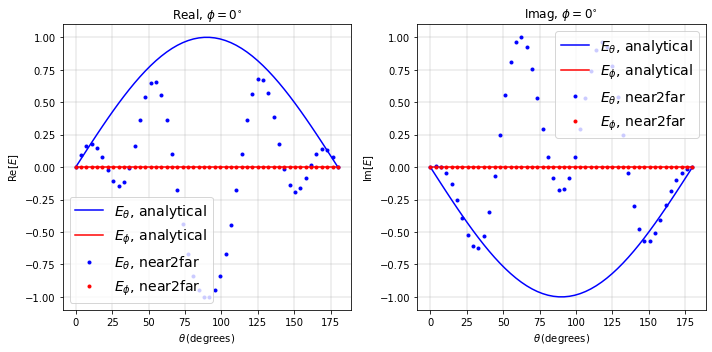

<Figure size 720x360 with 2 Axes>

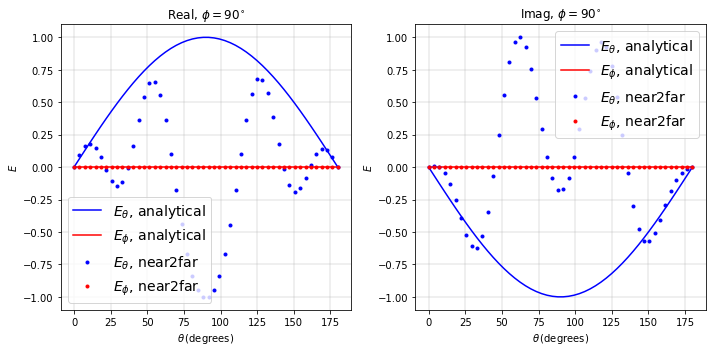

In [942]:
def scale_fn(val):
    val = val / np.max(np.abs(val))
    return 10.0*np.log10(val)

def plot_fn(val):
    return np.abs(val)

def realnorm_fn(val, norm_val):
    return np.real(val)/np.max(np.abs(np.real(norm_val)))

def imagnorm_fn(val, norm_val):
    return np.imag(val)/np.max(np.abs(np.imag(norm_val)))

fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[1,:,0], Ea), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[2,:,0], Ea), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[1,:,0], Ec), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[2,:,0], Ec), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Re[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 0^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[1,:,0], Ea), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[2,:,0], Ea), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[1,:,0], Ec), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[2,:,0], Ec), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Im[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 0^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()


fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[1,:,1], Ea), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[2,:,1], Ea), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[1,:,1], Ec), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[2,:,1], Ec), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 90^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[1,:,1], Ea), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[2,:,1], Ea), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[1,:,1], Ec), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[2,:,1], Ec), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 90^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()

plt.show()